In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import os
from keras.models import model_from_json, Model
import misc
import scipy.ndimage

Using TensorFlow backend.


In [2]:
# RELOAD MODEL

# model reconstruction from JSON
with open(os.getcwd() + '/model_weights/model_architecture3.json', 'r') as f:
    autoencoder = model_from_json(f.read())
# load weights into the model
autoencoder.load_weights(os.getcwd() + '/model_weights/model_v3.h5')

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               101136    
Total para

/Users/patricliu/miniconda3/envs/ml_env/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


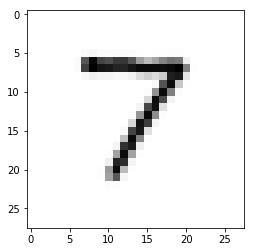

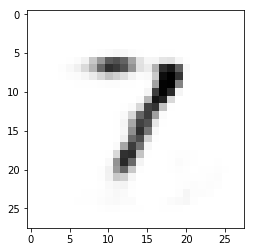

In [4]:
# TEST ON CUSTOM IMAGE

# load and show custom image
user_array = scipy.ndimage.imread('sample.png', flatten=True, mode=None)
user_array = (-user_array/255) + 1
shape = np.shape(user_array)
imgplot = plt.imshow(user_array, cmap = 'Greys')
plt.show()
# compute and show reconstruction
input_vector = misc.array_2_vec(user_array)
output_vector = autoencoder.predict(np.array([input_vector, input_vector]))[0]
output_array = misc.vec_2_array(output_vector, (28,28) )
imgplot = plt.imshow(output_array, cmap = 'Greys')
plt.show()

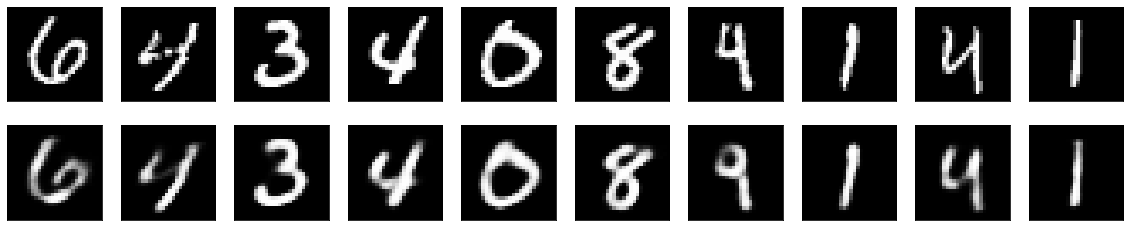

In [9]:
# TEST ON MNIST DATA

import mnist_loader
# load training data
training_data, validation_data, test_data_ = mnist_loader.load_data_wrapper()
num_digits = 10
test_data = np.array(list(map(lambda x: np.squeeze(x), np.array(list(test_data_))[:,0])))
np.random.shuffle(test_data)
test_data = test_data[0:num_digits]
predicted_imgs = autoencoder.predict(test_data)
# copypasta code to display digits
plt.figure(figsize=(2*num_digits, 4))
for i in range(num_digits):
    # display original
    ax = plt.subplot(2, num_digits, i + 1)
    plt.imshow(test_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, num_digits, i + 1 + num_digits)
    plt.imshow(predicted_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()